In [1]:
!pip install pandera

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 3.8 MB/s eta 0:00:00


# Downloading Data

In [2]:
!wget https://s3.amazonaws.com/tripdata/202412-citibike-tripdata.zip
!unzip 202412-citibike-tripdata.zip


--2025-01-19 16:22:22--  https://s3.amazonaws.com/tripdata/202412-citibike-tripdata.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.15.176.242, 52.217.171.56, 54.231.237.8, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.15.176.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 450888449 (430M) [application/zip]
Saving to: ‘202412-citibike-tripdata.zip’

202412-citibike-tri 100%[===================>] 430.00M  61.7MB/s    in 5.7s    

2025-01-19 16:22:28 (75.5 MB/s) - ‘202412-citibike-tripdata.zip’ saved [450888449/450888449]

Archive:  202412-citibike-tripdata.zip
 extracting: 202412-citibike-tripdata_1.csv  
 extracting: 202412-citibike-tripdata_3.csv  
 extracting: 202412-citibike-tripdata_2.csv  


In [3]:
import pandas as pd

# Loading the CSV file into a DataFrame
df = pd.read_csv('./202412-citibike-tripdata_1.csv', low_memory=False)


In [4]:
# Displaying the first few rows of the DataFrame
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,B44E5B10AEE58AD0,classic_bike,2024-12-14 10:58:18.153,2024-12-14 11:11:11.308,Frederick Douglass Blvd & W 145 St,7954.12,E 138 St & 5 Ave,7809.13,40.823061,-73.941928,40.814490,-73.936153,member
1,BC252DC6A6011556,electric_bike,2024-12-12 14:46:12.473,2024-12-12 16:45:37.777,Madison Ave & E 99 St,7443.01,NaN,NaN,40.789485,-73.952429,40.780000,-73.960000,member
2,6FBE55EF6FE8736D,electric_bike,2024-12-11 07:55:18.770,2024-12-11 08:02:23.460,Columbia St & Kane St,4422.05,NaN,NaN,40.687632,-74.001626,40.690000,-74.000000,member
3,908890DE7FDCF9FE,electric_bike,2024-12-09 22:51:11.668,2024-12-09 22:57:43.495,E 13 St & 2 Ave,5820.08,E 10 St & 2 Ave,5746.02,40.731539,-73.985302,40.729708,-73.986598,member
4,D5D366379A4DC0A8,classic_bike,2024-12-10 18:48:40.063,2024-12-10 19:10:32.264,11 Ave & W 41 St,6726.01,E 25 St & 1 Ave,6004.07,40.760301,-73.998842,40.738177,-73.977387,member


In [5]:
df.shape

(1000000, 13)

In [6]:
# Getting info of row counts
print(df.count())

ride_id               1000000
rideable_type         1000000
started_at            1000000
ended_at              1000000
start_station_name     999375
start_station_id       999375
end_station_name       996417
end_station_id         995525
start_lat             1000000
start_lng             1000000
end_lat                999795
end_lng                999795
member_casual         1000000
dtype: int64


In [7]:
print(df.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


In [8]:
print(df['member_casual'].unique())
print(df['rideable_type'].unique())

['member' 'casual']
['classic_bike' 'electric_bike']


#1 (a) Validate the datatype of each column

In [9]:
import pandera as pa
from pandera import Column, DataFrameSchema, Check
import pandas as pd

# Define categorical values for rideable_type and member_casual
valid_rideable_types = df['rideable_type'].unique()
valid_member_types = df['member_casual'].unique()

# Define schema with key fields and categories
schema = DataFrameSchema({
    "ride_id": Column(pa.String, unique=True),
    "rideable_type": Column(pa.String, Check.isin(valid_rideable_types)),
    "started_at": Column(pa.String),
    "ended_at": Column(pa.String),
    "start_station_name": Column(pa.String),
    "start_station_id": Column(pa.String),
    "end_station_name": Column(pa.String),
    "end_station_id": Column(pa.String),
    "start_lat": Column(pa.Float),
    "start_lng": Column(pa.Float),
    "end_lat": Column(pa.Float),
    "end_lng": Column(pa.Float),
    "member_casual": Column(pa.String, Check.isin(valid_member_types))
})

# Validate with lazy=True to capture all errors
try:
    validated_df = schema.validate(df, lazy=True)
except pa.errors.SchemaErrors as e:
    print("Schema validation errors detected!")
    print(e.failure_cases)  # Shows all rows and columns with errors


Schema validation errors detected!
     schema_context              column         check check_number  \
0            Column  start_station_name  not_nullable         None   
6473         Column      end_station_id  not_nullable         None   
6475         Column      end_station_id  not_nullable         None   
6476         Column      end_station_id  not_nullable         None   
6477         Column      end_station_id  not_nullable         None   
...             ...                 ...           ...          ...   
3239         Column    end_station_name  not_nullable         None   
3240         Column    end_station_name  not_nullable         None   
3241         Column    end_station_name  not_nullable         None   
3242         Column    end_station_name  not_nullable         None   
9717         Column             end_lng  not_nullable         None   

     failure_case   index  
0             NaN    7183  
6473          NaN  414584  
6475          NaN  414587  
6476        

##1. (b) Analyze each feature and write an appropriate check/scheme for them.

In [10]:
import pandera as pa
from pandera import Column, DataFrameSchema, Check

schema = pa.DataFrameSchema({
    "ride_id": Column(pa.String, unique=True),
    "rideable_type": Column(pa.String, Check.isin(["electric_bike", "classic_bike", "docked_bike"])),
    "started_at": Column(pa.String, Check(lambda x: pd.to_datetime(x, errors='coerce').notna())),
    "ended_at": Column(pa.String, Check(lambda x: pd.to_datetime(x, errors='coerce').notna())),
    "start_station_name": Column(pa.String, nullable=True),
    "start_station_id": Column(pa.String, nullable=True),
    "end_station_name": Column(pa.String, nullable=True),
    "end_station_id": Column(pa.String, nullable=True),
    "start_lat": Column(pa.Float, Check(lambda x: -90 <= x <= 90)),
    "start_lng": Column(pa.Float, Check(lambda x: -180 <= x <= 180)),
    "end_lat": Column(pa.Float, Check(lambda x: -90 <= x <= 90)),
    "end_lng": Column(pa.Float, Check(lambda x: -180 <= x <= 180)),
    "member_casual": Column(pa.String, Check.isin(["member", "casual"]))
})

# Validate with lazy to capture all errors
try:
    validated_df = schema.validate(df, lazy=True)
except pa.errors.SchemaErrors as e:
    print("Schema validation errors detected!")
    print(e.failure_cases)  # Shows all rows and columns with errors

Schema validation errors detected!
    schema_context   column         check check_number  \
0           Column  end_lat  not_nullable         None   
272         Column  end_lng  not_nullable         None   
282         Column  end_lng  not_nullable         None   
281         Column  end_lng  not_nullable         None   
280         Column  end_lng  not_nullable         None   
..             ...      ...           ...          ...   
135         Column  end_lat  not_nullable         None   
134         Column  end_lat  not_nullable         None   
133         Column  end_lat  not_nullable         None   
132         Column  end_lat  not_nullable         None   
413         Column  end_lng      <lambda>            0   

                                          failure_case   index  
0                                                  NaN    2143  
272                                                NaN  415913  
282                                                NaN  416309  
281     

## 1 (c) Add data validation rules to verify that a ride's end time occurs after its start time using Pandera's decorator functionality.

In [11]:
# Define the schema with nullable 'end_lat'
ride_data_schema = DataFrameSchema({
    "start_station_id": Column(pa.String, nullable=True),
    "end_station_name": Column(pa.String, nullable=True),
    "end_station_id": Column(pa.String, nullable=True),
    "start_lat": Column(pa.Float, checks=[Check.ge(-90), Check.le(90)]),
    "start_lng": Column(pa.Float, checks=[Check.ge(-180), Check.le(180)]),
    "end_lat": Column(pa.Float, nullable=True, checks=[Check.ge(-90), Check.le(90)]),  # Allow NaN here
    "end_lng": Column(pa.Float, nullable=True, checks=[Check.ge(-180), Check.le(180)]),
    "member_casual": Column(pa.String, checks=[Check.isin(["member", "casual"])]),
    "ride_id": Column(pa.String, nullable=False),
    "rideable_type": Column(pa.String, checks=[Check.isin(["bike","classic_bike", "electric_bike", "docked_bike"])]),
    "started_at": Column(pa.String),
    "ended_at": Column(pa.String),
    "start_station_name": Column(pa.String, nullable=True),
}, checks=[
    Check(lambda df: pd.to_datetime(df["ended_at"]) > pd.to_datetime(df["started_at"]),
          error="End time must be after start time",
          name="ended_after_started")
])

# Validate the DataFrame
try:
    validated_df = ride_data_schema.validate(df)
    print("DataFrame is valid!")
except pa.errors.SchemaErrors as e:
    print("DataFrame validation failed:")
    print(e)


DataFrame is valid!


#2 (a) Validate the datatype of each column by creating an expectation suite.


In [12]:
!pip install great_expectations -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 36.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.


In [13]:
import great_expectations as gx
from great_expectations.data_context.types.base import DataContextConfig
from great_expectations.checkpoint import CheckpointResult

import pandas as pd

df=pd.read_csv("202412-citibike-tripdata_1.csv",low_memory=False)

In [14]:
#1. Create a Data Context
context = gx.get_context(mode="file")

print(type(context).__name__)

FileDataContext


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# 2. Set up a Datasource (CSV file example)
data_source_name = "citibike-tripdata_data_source"
data_source = context.data_sources.add_pandas(name=data_source_name)


# A dataframe Data Asset is used to group your Validation Results.
# You can think it like a table of a database.
data_asset_name = "citibike-tripdata_dataframe_data_asset"
data_asset = data_source.add_dataframe_asset(name=data_asset_name)

In [16]:
# 3. Create a Batch from the DataFrame

# Batch Definitions for dataframe Data Assets don't work to subdivide
# the data returned for validation. Instead, they serve as an additional layer of
# organization and allow you to further group your Validation Results.

batch_definition = data_asset.add_batch_definition_whole_dataframe("batch definition")
batch_parameters = {"dataframe": df}
batch = batch_definition.get_batch(batch_parameters)
print(batch.head(3))

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

            ride_id  rideable_type               started_at  \
0  B44E5B10AEE58AD0   classic_bike  2024-12-14 10:58:18.153   
1  BC252DC6A6011556  electric_bike  2024-12-12 14:46:12.473   
2  6FBE55EF6FE8736D  electric_bike  2024-12-11 07:55:18.770   

                  ended_at                  start_station_name  \
0  2024-12-14 11:11:11.308  Frederick Douglass Blvd & W 145 St   
1  2024-12-12 16:45:37.777               Madison Ave & E 99 St   
2  2024-12-11 08:02:23.460               Columbia St & Kane St   

  start_station_id  end_station_name end_station_id  start_lat  start_lng  \
0          7954.12  E 138 St & 5 Ave        7809.13  40.823061 -73.941928   
1          7443.01               NaN            NaN  40.789485 -73.952429   
2          4422.05               NaN            NaN  40.687632 -74.001626   

    end_lat    end_lng member_casual  
0  40.81449 -73.936153        member  
1  40.78000 -73.960000        member  
2  40.69000 -74.000000        member  


In [17]:
# creating expctations for creating an expectation suite
expectations = [
    gx.expectations.ExpectColumnValuesToBeOfType(column="ride_id", type_="str"),
    gx.expectations.ExpectColumnValuesToBeInSet(column="rideable_type", value_set=["bike", "scooter", "electric bike"]),
    gx.expectations.ExpectColumnValuesToBeOfType(column="started_at", type_="str"),
    gx.expectations.ExpectColumnValuesToBeOfType(column="ended_at", type_="str"),
    gx.expectations.ExpectColumnValuesToBeOfType(column="start_station_name", type_="str"),
    gx.expectations.ExpectColumnValuesToBeOfType(column="start_station_id", type_="str"),
    gx.expectations.ExpectColumnValuesToBeOfType(column="end_station_name", type_="str"),
    gx.expectations.ExpectColumnValuesToBeOfType(column="end_station_id", type_="str"),
    gx.expectations.ExpectColumnValuesToBeOfType(column="start_lat", type_="str"),  # Latitude valid range
    gx.expectations.ExpectColumnValuesToBeOfType(column="start_lng", type_="str"),  # Longitude valid range
    gx.expectations.ExpectColumnValuesToBeOfType(column="end_lat", type_="str"),  # Latitude valid range
    gx.expectations.ExpectColumnValuesToBeOfType(column="end_lng", type_="str"),  # Longitude valid range
    gx.expectations.ExpectColumnValuesToBeInSet(column="member_casual", value_set=["member", "casual"])
]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
suite_name = "citibike-tripdata_expectation_suite" # Name of the Suite
suite = gx.ExpectationSuite(name=suite_name)

suite = context.suites.add(suite)


In [19]:
# adding expectations to suite
for expec in expectations:
  suite.add_expectation(expec)

definition_name = "citibike-tripdata_validation_definition"
validation_definition = gx.ValidationDefinition(
    data=batch_definition, suite=suite, name=definition_name
)

# Save the validation defintion to your context
validation_definition = context.validation_definitions.add(validation_definition)

In [20]:
validation_definition_name = "citibike-tripdata_validation_definition"
validation_definition = context.validation_definitions.get(validation_definition_name)

validation_results = validation_definition.run(batch_parameters=batch_parameters)


Calculating Metrics:   0%|          | 0/66 [00:00<?, ?it/s]

In [21]:
print(validation_results)


{
  "success": false,
  "results": [
    {
      "success": true,
      "expectation_config": {
        "type": "expect_column_values_to_be_of_type",
        "kwargs": {
          "batch_id": "citibike-tripdata_data_source-citibike-tripdata_dataframe_data_asset",
          "column": "ride_id",
          "type_": "str"
        },
        "meta": {},
        "id": "dcf4bd65-28a1-4d42-90eb-6b766a42706b"
      },
      "result": {
        "element_count": 1000000,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "partial_unexpected_list": [],
        "missing_count": 0,
        "missing_percent": 0.0,
        "unexpected_percent_total": 0.0,
        "unexpected_percent_nonmissing": 0.0,
        "partial_unexpected_counts": [],
        "partial_unexpected_index_list": []
      },
      "meta": {},
      "exception_info": {
        "raised_exception": false,
        "exception_traceback": null,
        "exception_message": null
      }
    },
    {
      "success": f

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2 (b) Implement an Action that will send a mail when encountering a failure

In [22]:
from great_expectations.checkpoint import (
    SlackNotificationAction,
    UpdateDataDocsAction,
    EmailAction
)

# Getting Great Expectation context for Validation
context = gx.get_context()

validation_definitions = [
    context.validation_definitions.get("citibike-tripdata_validation_definition")
]

In [23]:
email_action =[EmailAction(
    name="send_email_on_failure",
    smtp_address='smtp.gmail.com',
    smtp_port=587,
    receiver_emails="24210048@iitgn.ac.in",
    sender_login="24210063@iitgn.ac.in",
    sender_password="",
    use_tls=True,
    notify_on="all",
)]

In [24]:
checkpoint_name = "citibike-tripdata_checkpoint"
checkpoint = gx.Checkpoint(
    name=checkpoint_name,
    validation_definitions=validation_definitions,
    actions=email_action,
    result_format={"result_format": "COMPLETE"},
)

# Save the Checkpoint to the Data Context
context.checkpoints.add(checkpoint)

# Retrieve the Checkpoint later
checkpoint_name = "citibike-tripdata_checkpoint"
checkpoint = context.checkpoints.get(checkpoint_name)

In [25]:
validation_results = checkpoint.run(
    batch_parameters=batch_parameters, expectation_parameters=suite
)

Calculating Metrics:   0%|          | 0/66 [00:00<?, ?it/s]

ERROR:great_expectations.checkpoint.actions:Failed to authenticate to the SMTP server at address: smtp.gmail.com


OUTPUT of the email:

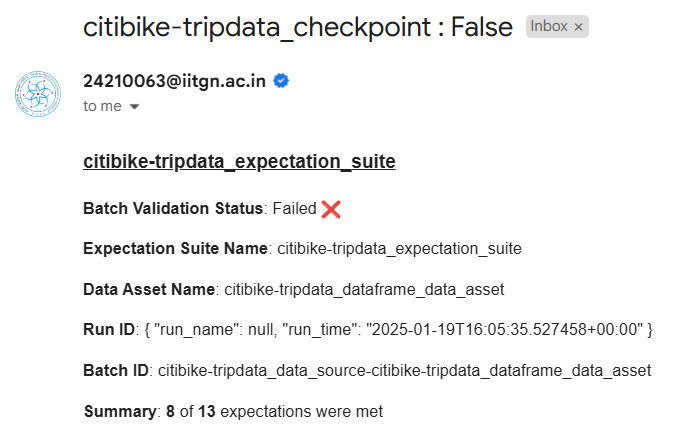